<a href="https://colab.research.google.com/github/larkul/halmstad_univ_bibliometric_analysis/blob/main/halmstad_univ_bibliometric_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
#install/import libraries
import pandas as pd
import numpy as np
!pip install pandasql
from pandasql import sqldf
import plotly.graph_objects as go
import plotly.express as px
import math
!pip install -U kaleido


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.6 MB/s eta 0:00:00


In [2]:
# create a loop that will get all sheet names and add them as a variable in the "sheet_name" 
xlsx = pd.read_excel('hh_scopus_2003-2022_final.xlsx', sheet_name=None, header=None)
for sheet in xlsx.keys(): xlsx[sheet].to_excel(sheet+'.xlsx', header=False, index=False)

In [38]:
# Load scopus data
asjc_all = pd.read_excel('asjc_all.xlsx')


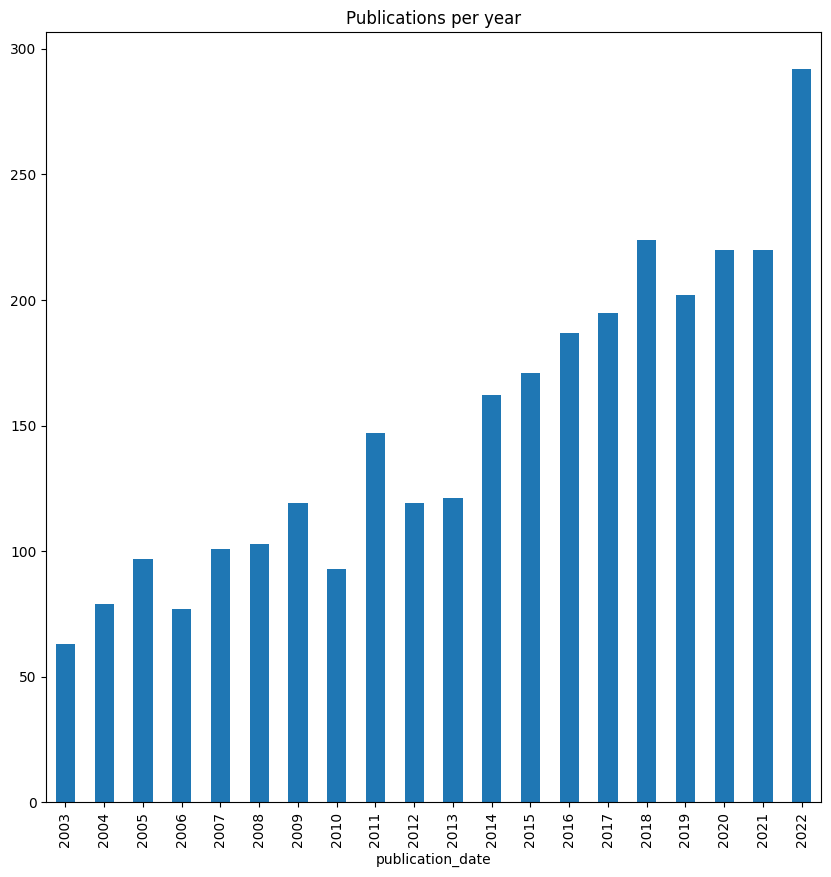

In [39]:
#group data by year
by_year = asjc_all.groupby(asjc_all.publication_date)['eid'].nunique().reset_index()
ax=by_year.plot(kind='bar', x='publication_date', legend=None, title='Publications per year', figsize=(10, 10))

#save as png
ax.figure.savefig('data_by_year.png')

In [40]:
# limit to asjc categories from 2019 study 
query = """SELECT*
           FROM asjc_all 
           WHERE asjc_code IN (1401,1408,1702,1705,1707,1708,1711,1712,2100,2209,2210,2732,2908,2910,3202,3304,3612)
        """
# Execute the query
asjc_publ_2019 = sqldf(query)
asjc_publ_2019

#save the data to excel
asjc_publ_2019.to_excel('asjc_publ_2019.xlsx')

In [41]:
# Load scopus data categories from 2019 study 
asjc_publ_2019 = pd.read_excel('asjc_publ_2019.xlsx')

In [42]:
# Yearly counts by asjc field
yearly_counts = asjc_publ_2019.groupby(['publication_date', 'asjc_name'])['eid'].count().reset_index()
yearly_pivot = yearly_counts.pivot(index='asjc_name', columns='publication_date', values='eid')
yearly_pivot = yearly_pivot.fillna(0)
yearly_pivot

#save to excel
#yearly_pivot.to_excel('yearly_pivot.xlsx', index=False)


publication_date,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
asjc_name,,,,,,,,,,,,,,,,,,,,
Applied Psychology,0.0,1.0,3.0,2.0,1.0,0.0,3.0,4.0,5.0,2.0,4.0,3.0,10.0,5.0,7.0,12.0,11.0,13.0,16.0,16.0
Artificial Intelligence,5.0,4.0,4.0,5.0,7.0,8.0,11.0,6.0,9.0,11.0,9.0,6.0,11.0,7.0,3.0,7.0,9.0,13.0,16.0,25.0
"Business, Management and Accounting (miscellaneous)",2.0,6.0,1.0,2.0,1.0,3.0,3.0,1.0,4.0,3.0,3.0,3.0,6.0,4.0,4.0,5.0,2.0,2.0,1.0,4.0
Computer Networks and Communications,2.0,1.0,2.0,1.0,5.0,10.0,11.0,10.0,7.0,11.0,15.0,20.0,27.0,29.0,15.0,28.0,17.0,19.0,19.0,13.0
Computer Vision and Pattern Recognition,2.0,3.0,2.0,7.0,8.0,3.0,3.0,1.0,6.0,4.0,3.0,9.0,5.0,10.0,4.0,14.0,6.0,9.0,6.0,5.0
Education,3.0,1.0,1.0,0.0,2.0,4.0,2.0,5.0,6.0,7.0,6.0,7.0,7.0,11.0,9.0,8.0,18.0,8.0,7.0,16.0
Fundamentals and skills,0.0,0.0,0.0,4.0,2.0,2.0,2.0,1.0,11.0,3.0,1.0,3.0,6.0,11.0,6.0,6.0,0.0,4.0,5.0,4.0
General Energy,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,6.0,6.0,3.0,0.0,6.0,5.0
Hardware and Architecture,0.0,1.0,2.0,1.0,4.0,5.0,3.0,3.0,4.0,2.0,5.0,1.0,9.0,9.0,6.0,8.0,3.0,10.0,8.0,9.0


<Axes: title={'center': 'Publications per year'}, xlabel='publication_date'>

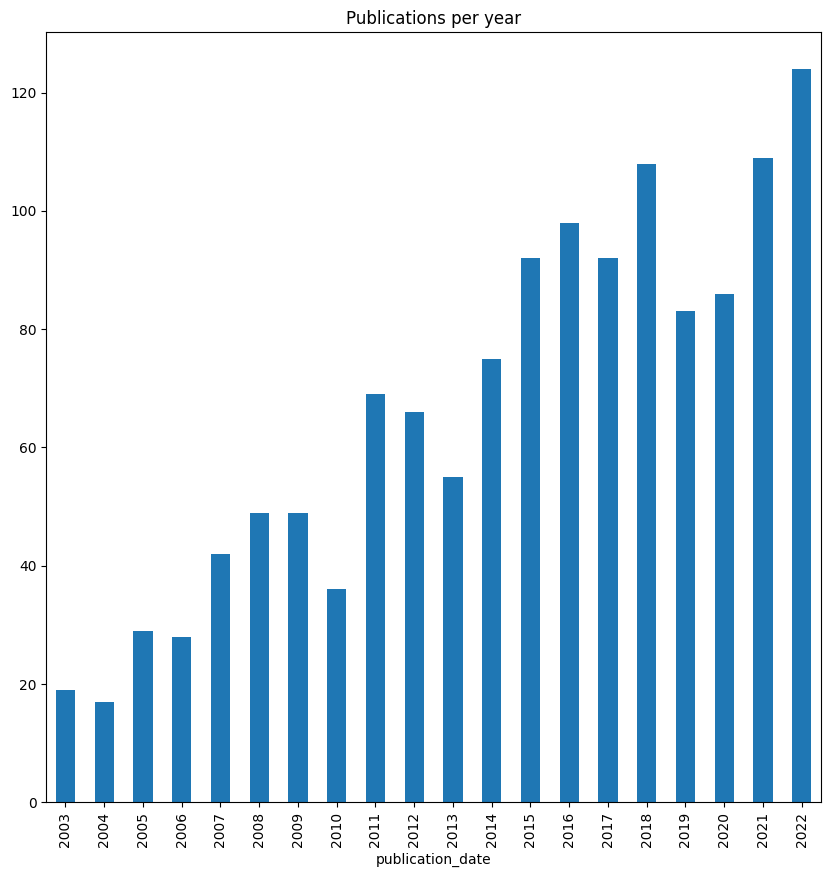

In [43]:
#group data by year (asjc selection)
by_year = asjc_publ_2019.groupby(asjc_publ_2019.publication_date)['eid'].nunique().reset_index()
by_year.plot(kind='bar', x='publication_date', legend=None, title='Publications per year', figsize=(10, 10))
#save as png
#ax.figure.savefig('data_by_year.png')

<Axes: title={'center': 'Publications per asjc '}, ylabel='asjc_name'>

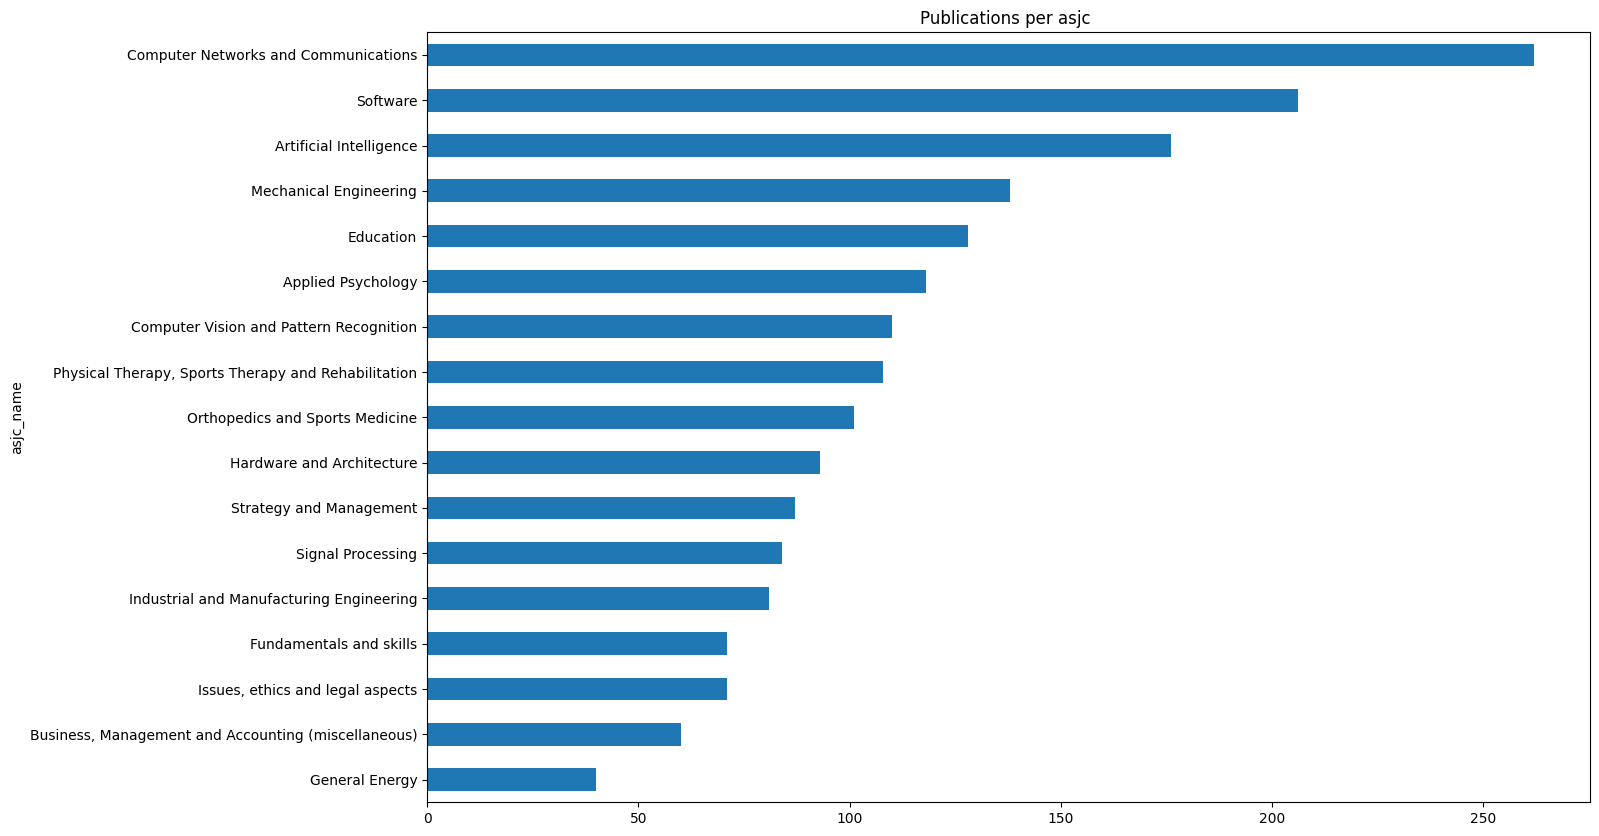

In [44]:
#group data by category (asjc selection)
by_field = asjc_publ_2019.groupby(asjc_publ_2019.asjc_name)['eid'].count().reset_index().sort_values('eid')
by_field.plot(kind='barh', x='asjc_name', legend=None, title='Publications per asjc ', figsize=(15, 10))
#save as png
#ax.figure.savefig('data_by_category.png')

In [4]:
#load data for bubble chart 2019 categories
asjc_bubble_2019 = pd.read_excel('asjc_2019_study.xlsx')

In [48]:
#create bubble chart 2019 categories
fig_2019 = px.scatter(asjc_bubble_2019, x="publ", y="mean_citation", log_x=True, size = "publ", size_max=25, color="asjc_category", text="asjc_code", hover_name="asjc_category")

#show
fig_2019.show()

#save as html
fig_2019.write_html("asjc_2019.html")
#fig_2019.write_image("asjc_2019.png")

In [22]:
#load data for bubble chart top 20 categories
asjc_bubble_top20 = pd.read_excel('asjc_2023_top20.xlsx')

In [33]:
#create bubble chart top 20 categories
fig_top20 = px.scatter(asjc_bubble_top20, x="publ", y="mean_citation", log_x=True, size = "publ", size_max=25, color="asjc_category", text="asjc_code", hover_name="asjc_category")

#show
fig_top20.show()
#save as html
fig_top20.write_html("asjc_top20.html")
#fig_top20.write_image("asjc_top20.png")

ValueError: ignored